In [1]:
import tensorflow as tf
print(tf.__version__)

1.12.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 8s 2us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

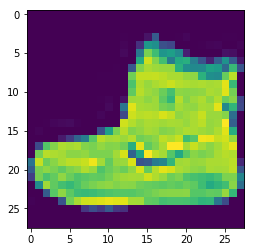

In [6]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
#print(training_labels[0])
print(training_images[0])

In [7]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [24]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

callbacks = myCallback()
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9808
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 4s 74us/step - loss: 0.0506 - acc: 0.9808


In [18]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 36us/step


[0.6996546328403056, 0.8859]

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.6):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training =  True
            
